In [1]:
import os
os.environ['KERAS_BACKEND']='theano' 
import keras

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


## regression

In [3]:
import numpy as np
np.random.seed(87)

from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt 

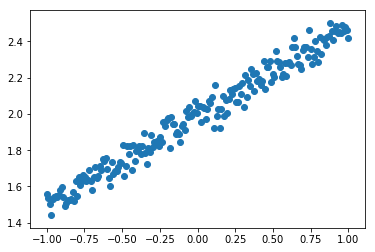

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`


Training -----------
train cost:  4.215881824493408
train cost:  0.1475929468870163
train cost:  0.02226516231894493
train cost:  0.006970857735723257
train cost:  0.0035180319100618362
train cost:  0.0026829575654119253
train cost:  0.0024799411185085773
train cost:  0.0024305670522153378
train cost:  0.002418557880446315
train cost:  0.0024156379513442516

Testing ------------
40/40 [==============================] - 0s
test cost: 0.00274134939536
Weights= [[ 0.48863348]] 
biases= [ 1.98987675]


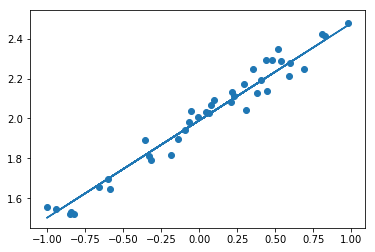

In [20]:
#create data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))   #np.random.normal(mu, sigma, size)
                                                       #P(-0.05 < X < 0.05) = 65%
plt.scatter(X, Y)                                      
plt.show()

#train_data, test_data
X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

#create model
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))
model.compile(loss='mse', optimizer='sgd')   #sigma, sgd

#training model 
print('Training -----------')
for step in range(1000):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)
        
#test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)

#get model.layers[0] weights 和 biases compare with m&b
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b) 

# plotting the prediction   与测试集的值进行对比
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)      #Y_test compare with Y_pred
plt.show()

In [21]:
#Classifier
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist   #mnist data
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28px), y shape (10,000, )
#60000個data  10000個label

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
                      #60000*.shape[0] 28*28 / 255
#     每个像素都是在 0 到 255 之间的，标准化之后就变成了 0 到 1 之间。
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize
#  y 是一个数值，在 0-9 之间，现在是一个大小为 10 的向量，它属于哪个数字，就在哪个位置为 1，其他位置都是 0。

y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

# Another way to build your neural net
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

# Another way to define your optimizer
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# We add metrics to get more results you want to see
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, epochs=2, batch_size=32)

print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)
